# Machine Learning (CS535): Assignment 2
## Linear and Logistic Regression
#### Name: Muhammad Waleed
#### Roll Number: 22030017

### Instructions


*   The aim of this assignment is to implement linear and logistic regression from scratch.
*   You must use the Python programming language.
*   You can add as many code/markdown cells as required.
*   ALL cells must be run (and outputs visible) in order to get credit for your work.
*   Please use procedural programming style and comment your code thoroughly.
*   There are two parts of this assignment. In part 1, you can use **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and any other standard Python libraries. You are $\color{red}{\text{not allowed}}$ to use **scikit-learn**, or any other machine learning toolkit. You can only use **scikit-learn** in part 2.
*   **Carefully read the submission instructions and plagiarism policy.**
*   Deadline to submit this assignment is 7th November 2022, 11:55pm on LMS.

### Submission Instructions

You should submit both your notebook file (.ipynb) and python script (.py) on LMS.
Please name your files Name_RollNo_Assignment2. Zip these files in a folder and name
the folder Name_RollNo_Assignment2. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**


### Introduction
In this assignment, you will be implementing linerar regression and logistic regression models for the provided datasets from scratch. A description of the problem statement is given at the start of each part. 

Try to write modeular code as some of the functions you write for task 1 may be usable in task 2.

Have fun!

## Task 1: Multivariate Linear Regression

In this part, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately. 

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

### Part A: Implementation from scratch

Use the slides and textbook as a reference to write the gradient descent algorithm from scratch for this problem.

In [1]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Reading the data from the files and analyzing it

task1_path = "/content/drive/MyDrive/Assignment 2/Dataset/Task1"

with open(task1_path + "/trainLabels.txt", "r") as f:
  train_labels = f.readlines()

with open(task1_path + "/trainData.txt", "r") as f:
  train_data = f.readlines()

with open(task1_path + "/testLabels.txt", "r") as f:
  test_labels = f.readlines()

with open(task1_path + "/testData.txt", "r") as f:
  test_data = f.readlines()

print("Number of train instances:", len(train_data))
print("Number of train features:", len(train_data[0].split(" ")))
print("Number of test instances:", len(test_data))
print("Number of train features:", len(test_data[0].split(" ")))

Number of train instances: 404
Number of train features: 13
Number of test instances: 102
Number of train features: 13


In [14]:
# Converting txt file data to numpy array

def txt_to_numpy(txt_dataset):
  l = []
  for i in txt_dataset:
    data = i.replace("\n", "").split(" ")
    to_int = []
    for j in data:
      to_int.append(float(j))
    l.append(to_int)
  
  return np.array(l)


x_train = txt_to_numpy(train_data)
y_train = txt_to_numpy(train_labels)
x_test = txt_to_numpy(test_data)
y_test = txt_to_numpy(test_labels)

print("Shape of input training data:", x_train.shape)
print("Shape of input testing data:", x_test.shape)
print("Shape of output training data:", y_train.shape)
print("Shape of output testing data:", y_test.shape)

Shape of input training data: (404, 13)
Shape of input testing data: (102, 13)
Shape of output training data: (404, 1)
Shape of output testing data: (102, 1)


In [15]:
# Normalizing data

x_train_standard_deviation = np.std(x_train, axis=0)
x_train_mean = np.mean(x_train, axis=0)

x_test_standard_deviation = np.std(x_test, axis=0)
x_test_mean = np.mean(x_test, axis=0)

norm_x_train = (x_train - x_train_mean)/ x_train_standard_deviation
norm_x_test = (x_test - x_test_mean)/ x_test_standard_deviation


In [18]:
def hypothesis(x_train, y_train, weight): # linear regression
  
  y = np.matmul(np.transpose(weight), x_train)
  return y, weight

def MSE(y_pred, y_actual, cost=False): # Mean squared error
  y_pred = np.transpose(y_pred)
  if cost == True:
    error = np.sum(np.square(y_pred - y_actual))/(2*y_actual.shape[0])
  else:
    error = np.sum(np.square(y_pred - y_actual))/(y_actual.shape[0])
  return error

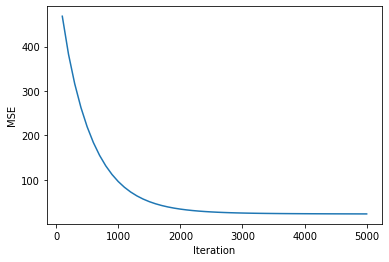

Cost on training dataset: 11.486433908805791
Cost on testing dataset: 10.051646499268585


In [28]:
# implementing Gradient Descent

def gradient_descent(x_train, y_train, x_test, learning_rate, iterations): 
  weight = np.zeros((x_train.shape[1]+1, 1)) # initialzing weights
  # Transforming x_train is such a way so that it bias will not be separate from the other weight matrix
  x = x_train.copy()
  x = np.transpose(x)  
  arr = np.ones((1,x_train.shape[0]))
  x = np.insert(x, 0, arr, axis=0)
  result = []
  run = []

  run_to = 100
  if iterations <= 500:
    run_to = 10
  c = 0
  for i in range(iterations): # iteration for gradient descent
    y_pred, weight = hypothesis(x, y_train, weight)
    c += 1
    if c == run_to: # storing MSE after 100 iteration
      error = MSE(y_pred, y_train)
      result.append(error)
      c = 0
      run.append(i)
    y_pred = np.transpose(y_pred)

    # updating the weights
    weight = np.subtract(weight, learning_rate * (((y_pred - y_train) * np.transpose(x)).mean(axis=0)).reshape(14,1))


  plt.xlabel("Iteration")
  plt.ylabel("MSE")
  plt.plot(run, result)
  plt.show()
  return error, weight

def predict(x_test, y_test, weight):  # prediction using trained weights
  x = x_test.copy()
  x = np.transpose(x)  
  arr = np.ones((1,x_test.shape[0]))
  x = np.insert(x, 0, arr, axis=0)
  pred, weight = hypothesis(x, y_test, weight)
  return pred


def Linear_Regression(norm_x_train, y_train, norm_x_test, learning_rate, iterations):
  error, weight = gradient_descent(norm_x_train, y_train, norm_x_test, learning_rate, iterations)
  return error, weight

# Running Linear Regression on training dataset
error, weight = Linear_Regression(norm_x_train, y_train, norm_x_test, 0.001, 5000)


# prediction on training dataset
pred = predict(norm_x_train, y_train, weight)
# prediction on testing dataset
pred_test = predict(norm_x_test, y_test, weight)

print("Cost on training dataset:", MSE(pred, y_train, cost=True))
print("Cost on testing dataset:", MSE(pred_test, y_test, cost=True))

### Part B: Regularized Linear Regression Using Scikit-learn

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [29]:
# Importing the modules
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

MSE using Linear Regression on Testing dataset:  20.982945190702583
MSE using Ridge on Testing dataset:  20.89920040025166
MSE using Lasso on Testing dataset:  20.15955164250332
MSE using Elastic Net on Testing dataset:  25.16263185764403


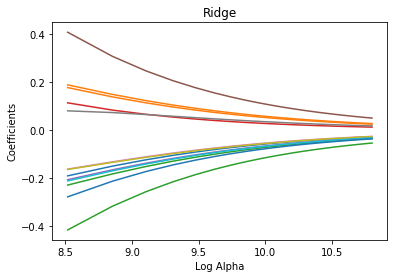

If we select starting log aplha 8.52 and increment 7.6 for each iteration the log aplha for min MSE is: 8.52



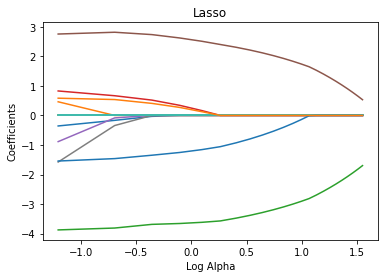

If we select starting log aplha -1.2 and increment -1.61 for each iteration the log aplha for min MSE is: -1.2



In [72]:
reg2 = LinearRegression().fit(norm_x_train, y_train) # Linear Regression
y_pred = reg2.predict(norm_x_test) # prediction using Linear Regression
print("MSE using Linear Regression on Testing dataset: ", mean_squared_error(y_test, y_pred)) # MSE on testing dataset


ridge = Ridge(alpha=1).fit(norm_x_train, y_train) # using Ridge 
ridge_pred = ridge.predict(norm_x_test) # prediction using Ridge
print("MSE using Ridge on Testing dataset: ", mean_squared_error(y_test, ridge_pred)) # MSE on testing dataset

lasso = Lasso(alpha=0.1).fit(norm_x_train, y_train) # using Lasso 
lasso_pred = lasso.predict(norm_x_test) # prediction using Lasso
print("MSE using Lasso on Testing dataset: ", mean_squared_error(y_test, lasso_pred)) # MSE on testing dataset

elastic_net = ElasticNet(random_state=0).fit(norm_x_train, y_train) # using Ridge Elastic Net
elastic_net_pred = elastic_net.predict(norm_x_test) # prediction using Elastic Net
print("MSE using Elastic Net on Testing dataset: ", mean_squared_error(y_test, elastic_net_pred)) # MSE on testing dataset



# alpha_start is staring value of alpha
# alpha_increment is how much to increase alpha 
# features is how many features are present in the dataset
# iterations is how many time to change/ increment alpha

def alpha_plot(norm_x_train, y_train, norm_x_test, y_test, model="ridge",  alpha_start=1000, alpha_increment=0.2, features=13, iterations=13): # Plot for different values of alpha for Ridge and Lasso
  c =  alpha_start 
  l = []
  weights = np.ones((features,iterations))
  error = []
  alpha = []
  
  for i in range(iterations): # storing results for different graphs for Ridge and Lasso 
    if model == "ridge":
      ridge = Ridge(alpha=c).fit(norm_x_train, y_train)
      pred = ridge.predict(norm_x_test)
      error.append(mean_squared_error(y_test, pred))
      alpha.append(np.log(c))
      l.append(np.log(c))
      coef = ridge.coef_
      for j in range(len(coef[0])):
        weights[j][i] = coef[0][j]
    

    else:
      lasso = Lasso(alpha=c).fit(norm_x_train, y_train)
      pred = lasso.predict(norm_x_test)
      error.append(mean_squared_error(y_test, pred))
      alpha.append(np.log(c))
      l.append(np.log(c))
      coef = lasso.coef_.reshape(1,13)
      for j in range(len(coef[0])):
        weights[j][i] = coef[0][j]   
    c += alpha_increment
  # plotting
  plt.xlabel("Log Alpha")
  plt.ylabel("Coefficients")
  if model == "ridge":
    plt.title("Ridge")
  else:
    plt.title("Lasso")
  for i in weights:
    plt.plot(l, i)

  plt.show()
  min_error = min(error)
  min_alpha = alpha[error.index(min_error)]
  print(f"If we select starting log aplha {str(round(np.log(alpha_start), 2))} and increment {str(round(np.log(alpha_increment), 2))} for each iteration the log aplha for min MSE is: {str(round(min_alpha, 2))}\n")


alpha_plot(norm_x_train, y_train, norm_x_test, y_test, model="ridge", alpha_start=5000, alpha_increment=2000, features=x_train.shape[1], iterations=23)
alpha_plot(norm_x_train, y_train, norm_x_test, y_test, model="lasso", alpha_start=0.3, alpha_increment=0.2, features=x_train.shape[1], iterations=23)

## Task 2: Logistic Regression

#### Problem:
The purpose of this assignment is to get you familiar with sentiment classification. By the end of this assignment you will have your very own “Sentiment Analyzer”. You are given with Large Movie Review Dataset that contains separate labelled train and test set. Your task is to train a Logistic Regression classifier on train set and report accuracy on test set.

#### Dataset:
The core dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). There are two top-level directories [train/, test/] corresponding to the training and test sets. Each contains [pos/, neg/] directories for the reviews with binary labels positive and negative. Within these directories, reviews are stored in text files named following the convention [[id]_[rating].txt] where [id] is a unique id and [rating] is the star rating for that review on a 1-10 scale. For example, the file [test/pos/200_8.txt] is the text for a positive-labeled test set example with unique id 200 and star rating 8/10 from IMDb.

#### Preprocessing:
In the preprocessing step you’re required to remove the stop words and punctuation marks and other unwanted characters from the reviews and convert them to lower case. You may find the string and regex module useful for this purpose. A stop word list is provided with the assignment statement.

#### Feature Extraction:
In the feature extraction step you can you’ll represent each review by the 3 features 𝑥0, 𝑥1, 𝑥2 and 1 class label 𝑦 as shown in the table below:

| Feature | Definition | Comment |
| --- | --- | --- |
| x_0 | count(positive words) ∈ review | Positive lexicon is provided |
| --- | --- | --- |
| x_2 | count(negative words) ∈ review | Negative lexicon is provided |
| --- | --- | --- |
| y | 1 if positive, 0 otherwise | Mentioned in directory name |


### Part A: Implementation from scratch

#### Guidelines:
Implement the following in order to complete this part:
* Sigmoid function
* Cross-entropy loss function
* Batch Gradient Descent
* Prediction function that predict whether the label is 0 or 1 for test reviews using learned logistic regression (use the decision threshold of 0.5)
* Evaluation function that calculates classification accuracy and confusion matrix on test set (the expected accuracy on the test set is around 72%)
* Report plots with no. of iterations/ epochs on x-axis and training/ validation loss on y-axis.

In [73]:
# importing modules
import os
import re
from google.colab import output

In [74]:
# Reading the data from the files and analyzing it

task2_path = "/content/drive/MyDrive/Assignment 2/Dataset/Task2"


# reading the negative words
with open(task2_path + "/negative_words.txt", "r", encoding="ISO-8859-1") as f:
  negative_words = f.readlines()
  negative_words_list = []
  for i in negative_words:
    negative_words_list.append(i.replace("\n", ""))

# reading the positive words
with open(task2_path + "/positive_words.txt", "r") as f:
  positive_words = f.readlines()
  positive_words_list = []
  for i in positive_words:
    positive_words_list.append(i.replace("\n", ""))

# reading the stop words
with open(task2_path + "/stop_words.txt", "r") as f:
  stop_words = f.readlines()
  stop_words_list = []
  for i in stop_words:
    i = i.replace("\n", "")
    i = re.sub(r'[^\w\s]', '', i)
    stop_words_list.append(i)

# reading the dataset and applying the preprocessing steps
def read_dataset(folder_path, lab):
  files_done = 0
  data = []
  label = []
  for i in os.listdir(task2_path + folder_path):
    output.clear() # used to clear the ouput of colab so I can know how many files have been processed
    files_done += 1
    print(folder_path, files_done)
    with open(task2_path + folder_path + "/" + i, "r") as f:
      para = f.readlines()
      para = re.sub(r'[^\w\s]', '', para[0]) # removing the puntucations
      para = para.split(" ")
      postive_count = 0
      negative_count = 0
      for i in para:
        j = i.lower()
        if j in stop_words_list:  # removing the stops words
          para.remove(i)
        elif j in positive_words_list:  # counting the positive words
          postive_count += 1
        elif j in negative_words_list:  # counting the negative words
          negative_count += 1
      
      result = np.array([postive_count, negative_count])
      data.append(result)
      label.append(lab)

  return label, data

label_pos_train, data_pos_train = read_dataset(folder_path="/train/pos", lab=1)
label_neg_train, data_neg_train = read_dataset(folder_path="/train/neg", lab=0)
label_pos_test, data_pos_test = read_dataset(folder_path="/test/pos", lab=1)
label_neg_test, data_neg_test = read_dataset(folder_path="/test/neg", lab=0)

/test/neg 12500


In [79]:
# Merging positive and negative dataset for training and testing

y_train = np.array(label_pos_train + label_neg_train).reshape(25000,1)
x_train = np.array(data_pos_train + data_neg_train)
y_test = np.array(label_pos_test + label_neg_test).reshape(25000,1)
x_test = np.array(data_pos_test + data_neg_test)


print("Shape of input training data:", x_train.shape)
print("Shape of input testing data:", x_test.shape)
print("Shape of output training data:", y_train.shape)
print("Shape of output testing data:", y_test.shape)

Shape of input training data: (25000, 2)
Shape of input testing data: (25000, 2)
Shape of output training data: (25000, 1)
Shape of output testing data: (25000, 1)


In [193]:
def sigmoid(x): # sigmoid
  z = 1/(1+np.exp(-x))
  return z

def hypothesis(x_train, y_train, weight):
  
  y = np.matmul(np.transpose(weight), x_train)
  y = sigmoid(y)
  return y, weight

def cost(y_pred, y_actual, cost=False): # cost function
  cost1 = -np.sum(y_actual*np.log(y_pred) + (1-y_actual)*np.log(1-y_pred))/y_pred.shape[0]
  return cost1


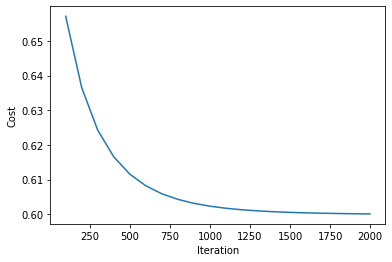

In [194]:
# implementing Gradient Descent
def gradient_descent(x_train, y_train, x_test,learning_rate, iterations):
  weight = np.zeros((x_train.shape[1]+1, 1)) # initialzing weights
  # Transforming x_train is such a way so that it bias will not be separate from the other weight matrix
  x = x_train.copy()
  x = np.transpose(x)  
  arr = np.ones((1,x_train.shape[0]))
  x = np.insert(x, 0, arr, axis=0)
  result = []
  run = []
  c = 0
  run_to = 100
  if iterations <= 500:
    run_to = 10
  for i in range(iterations): # iteration for gradient descent
    y_pred, weight = hypothesis(x, y_train, weight)
    c += 1
    if c == 100: # storing MSE after 100 iteration
      error = cost(y_pred.T, y_train)
      result.append(error)
      c = 0
      run.append(i)
    y_pred = np.transpose(y_pred)
    # updating the weights
    weight = np.subtract(weight, learning_rate * (((y_pred - y_train) * np.transpose(x)).mean(axis=0)).reshape(3,1))


  plt.xlabel("Iteration")
  plt.ylabel("Cost")
  plt.plot(run, result)
  plt.show()
  error = 0
  return error, weight

def predict(x_test, y_test, weight): # prediction using trained weights
  x = x_test.copy()
  x = np.transpose(x)  
  arr = np.ones((1,x_test.shape[0]))
  x = np.insert(x, 0, arr, axis=0)
  pred, weight = hypothesis(x, y_test, weight)
  pred[pred >= 0.5] = 1
  pred[pred < 0.5] = 0
  return pred.T


def Logistic_Regression(x_train, y_train, test, learning_rate, iterations):
  error, weight = gradient_descent(x_train, y_train, x_test, learning_rate, iterations)
  return error, weight

# Running Linear Regression on training dataset

error, weight = Logistic_Regression(x_train, y_train, x_test, 0.001, 2000)
pred_test = predict(x_test, y_test, weight)

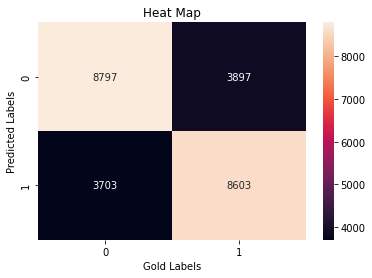

Accuracy on Testing dataset: 69.6


In [192]:
import pandas as pd
import seaborn as sns

# this eval method is to create a confusion matrix
def eval(predict, actual, show_matrix = False, show_heat_map = False):

  # Confusion matrix.
  data = {0: [0, 0], 1: [0, 0] }

  data2 = {"Accuracy": [0, 0], 'Precision': [0, 0],
          'Recall': [0, 0], 'F1_score': [0, 0]}


  df = pd.DataFrame(data)  

  # Metrics for each classification.

  TP = [0, 0]
  TN = [0, 0]
  FN = [0, 0]
  FP = [0, 0]

  Accuracy  = [0, 0]
  count = [0, 1]

  # Calculating metrics for given dataset

  for i in range(0, len(actual)):

    if int(predict[i]) == int(actual[i]):
      value = df.loc[int(predict[i]), int(predict[i])] + 1

      df.loc[int(predict[i]), int(predict[i])] = value + 1

    else:
      value = df.loc[int(predict[i]), int(actual[i])] + 1
      df.loc[int(predict[i]), int(actual[i])] = value + 1

  df.iloc[0,0] = df.iloc[0,0]/2
  df.iloc[0,1] = df.iloc[0,1]/2
  df.iloc[1,0] = df.iloc[1,0]/2
  df.iloc[1,1] = df.iloc[1,1]/2

  for i in range(0, 2):
    FP[i] = df.iloc[:,i].sum() - df.loc[i, i]
    TP[i] = df.loc[i, i]
    FN[i] = df.iloc[i,:].sum() - df.loc[i, i]


    df2 = df.copy()
    df2 = df2.drop(i, axis=0)
    df2 = df2.drop(i, axis=1)
    TN[i] = df2.values.sum()
    df2 = df.copy()

    Accuracy[i] = (TP[i] + TN[i])/(TP[i]+TN[i]+FP[i]+FN[i])

  data2["Accuracy"] = Accuracy

  metrics = pd.DataFrame(data2)

  if show_matrix == True:
    print(metrics)

  if show_heat_map == True:
    s = sns.heatmap(df, annot=True, fmt='d')
    s.set(xlabel='Gold Labels', ylabel='Predicted Labels')
    s.set_title('Heat Map')
    plt.show()

  return Accuracy[0]*100
Accuracy = eval(pred_test, actual=y_test, show_heat_map=True)
print("Accuracy on Testing dataset:", Accuracy)

### Part B: Use Scikit-learn

In this part, use scikit-learn’s [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation to train and test the logistic regression on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix on test set.

In [184]:
# using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

y_trai = y_train.reshape(y_train.shape[0])
y_tes = y_test.reshape(y_test.shape[0])

# Fitting the training dataset
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

# prediction on testing
y_pred = clf.predict(x_test) 

print("Accuracy on Testing dataset:", accuracy_score(y_pred, y_tes) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_tes))

Accuracy on Testing dataset: 69.544
Confusion Matrix:
 [[8686 3800]
 [3814 8700]]
